<a href="https://colab.research.google.com/github/Silence-o0/Test-tasks/blob/main/Task2/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2. Named entity recognition + image classification
The main goal of task is to understand what the user is asking using NLP and check if
he is correct or not using Computer Vision.

At first we should cloning the repository.


In [1]:
!git clone https://github.com/Silence-o0/Test-tasks

Cloning into 'Test-tasks'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 20 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 9.23 KiB | 9.23 MiB/s, done.
Resolving deltas: 100% (3/3), done.


Before starting we need to install requirements. It is worth noting that after installation, you may need to restart the notebook.

In [2]:
!pip install -r /content/Test-tasks/Task2/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 24.4 MB/s eta 0:00:0

Two preprocessed datasets were used for training. To execute all further code, you need to download the archives with the datasets and unzip them. You can download them from Google Drive at this [link](https://drive.google.com/drive/folders/1aifEZPkfM_9oWubFLyK7S0AzjBXF1mUG?usp=drive_link). There are also a folder with already trained models. You can just put these models in folder /content/Test-tasks/Task2 and go to inference test cases.

In [1]:
!unzip /content/data_ner.zip -d /content/Test-tasks/Task2/data_ner
!unzip /content/data_cv.zip -d /content/Test-tasks/Task2/data_cv

Показано результат, скорочений до останніх рядків (5000).
  inflating: /content/Test-tasks/Task2/data_cv/valid/flamingo/aug_1_23f58d4351.jpg  
  inflating: /content/Test-tasks/Task2/data_cv/valid/flamingo/479c797230.jpg  
  inflating: /content/Test-tasks/Task2/data_cv/valid/flamingo/0fa77c3d20.jpg  
  inflating: /content/Test-tasks/Task2/data_cv/valid/flamingo/aug_1_29dc7381e7.jpg  
  inflating: /content/Test-tasks/Task2/data_cv/valid/flamingo/aug_0_8fca64441a.jpg  
  inflating: /content/Test-tasks/Task2/data_cv/valid/flamingo/1ba8676ddc.jpg  
  inflating: /content/Test-tasks/Task2/data_cv/valid/flamingo/aug_0_3f3706266e.jpg  
  inflating: /content/Test-tasks/Task2/data_cv/valid/flamingo/aug_2_5a57a6d1e0.jpg  
  inflating: /content/Test-tasks/Task2/data_cv/valid/flamingo/aug_2_63ce71d1c4.jpg  
  inflating: /content/Test-tasks/Task2/data_cv/valid/flamingo/aug_1_348e1502f5.jpg  
  inflating: /content/Test-tasks/Task2/data_cv/valid/flamingo/013f6503e9.jpg  
  inflating: /content/Test-task

You need to unzip the ner_model and move cv_model to task folder too.

In [2]:
!unzip /content/ner_model.zip -d /content/Test-tasks/Task2/ner_model
!mv /content/cv_model.pth /content/Test-tasks/Task2

Archive:  /content/ner_model.zip
  inflating: /content/Test-tasks/Task2/ner_model/tokenizer.json  
  inflating: /content/Test-tasks/Task2/ner_model/vocab.txt  
  inflating: /content/Test-tasks/Task2/ner_model/special_tokens_map.json  
  inflating: /content/Test-tasks/Task2/ner_model/config.json  
  inflating: /content/Test-tasks/Task2/ner_model/model.safetensors  
  inflating: /content/Test-tasks/Task2/ner_model/tokenizer_config.json  
  inflating: /content/Test-tasks/Task2/ner_model/training_args.bin  


In [3]:
%cd /content/Test-tasks/Task2

/content/Test-tasks/Task2


Import libraries

In [4]:
from datasets import load_from_disk
from IPython.display import Image, display
import random
import os

# NER dataset

The main task of this NER model is recognizing animal titles. For this task were used an own dataset. This dataset has sentences, which containt animal titles. Sentences were generated by ChatGPT. The train dataset contains 95 rows, the validation dataset has 25 rows and the test one has 21 rows.

In [5]:
loaded_train_ds = load_from_disk("data_ner/train_dataset")
loaded_valid_ds = load_from_disk("data_ner/valid_dataset")
loaded_test_ds = load_from_disk("data_ner/test_dataset")

print("Train dataset structure:", loaded_train_ds)
print("Validation dataset structure:", loaded_valid_ds)
print("Test dataset structure:", loaded_test_ds)

Train dataset structure: Dataset({
    features: ['id', 'ner_tags', 'tokens'],
    num_rows: 95
})
Validation dataset structure: Dataset({
    features: ['id', 'ner_tags', 'tokens'],
    num_rows: 25
})
Test dataset structure: Dataset({
    features: ['id', 'ner_tags', 'tokens'],
    num_rows: 21
})


In [6]:
print("Row example:", loaded_train_ds[0])

Row example: {'id': 0, 'ner_tags': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 'tokens': ['', 'As', 'soon', 'as', 'we', 'entered', 'the', 'wildlife', 'reserve,', 'a', 'group', 'of', 'elephants', 'was', 'bathing', 'in', 'a', 'small', 'lake.', '']}


Model achieved accuracy N on test dataset.

# CV dataset

The main task of this model is classifying animal from an image. For this task were used a [dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals) from Kaggle. For training were used 18 of 90 classes. Each image were augmented 3 times using rotation, horizontal flip, resized crop. 20% of images of each class were randomly chosed for validation dataset and 10% randomly chosed for test dataset.

In [7]:
def count_files_in_directory(directory):
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    return len(files)

def count_files_in_subdirectories(directory):
    subdirectories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

    for subdirectory in subdirectories:
        subdirectory_path = os.path.join(directory, subdirectory)
        file_count = count_files_in_directory(subdirectory_path)
        print(f"'{subdirectory}': {file_count}")


In [8]:
print("Quantity of images in train dataset:")
directory = 'data_cv/train'
count_files_in_subdirectories(directory)

Quantity of images in train dataset:
'lion': 181
'tiger': 187
'crab': 178
'crow': 177
'flamingo': 184
'horse': 182
'owl': 179
'wolf': 186
'deer': 180
'zebra': 182
'duck': 177
'goose': 183
'cow': 184
'bear': 183
'fox': 181
'cat': 181
'goat': 182
'dog': 180


In [9]:
print("Quantity of images in validation dataset:")
directory = 'data_cv/valid'
count_files_in_subdirectories(directory)

Quantity of images in validation dataset:
'lion': 74
'tiger': 71
'crab': 69
'crow': 71
'flamingo': 75
'horse': 73
'owl': 72
'wolf': 75
'deer': 72
'zebra': 74
'duck': 69
'goose': 70
'cow': 69
'bear': 71
'fox': 72
'cat': 75
'goat': 74
'dog': 71


In [10]:
print("Quantity of images in test dataset:")
directory = 'data_cv/test'
count_files_in_subdirectories(directory)

Quantity of images in test dataset:
'lion': 36
'tiger': 39
'crab': 37
'crow': 38
'flamingo': 39
'horse': 39
'owl': 37
'wolf': 39
'deer': 39
'zebra': 38
'duck': 39
'goose': 40
'cow': 40
'bear': 39
'fox': 37
'cat': 38
'goat': 34
'dog': 39


Random example of image

horse


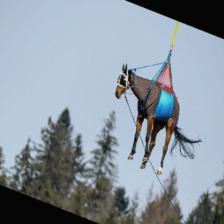

In [11]:
def display_random_image(directory):
    subdir = random.choice([d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))])
    image = random.choice([f for f in os.listdir(os.path.join(directory, subdir)) if os.path.isfile(os.path.join(directory, subdir, f))])
    print(f"{subdir}")
    display(Image(filename=os.path.join(directory, subdir, image)))

directory = 'data_cv/test'
display_random_image(directory)


# Test cases

The first input is text, which contain an animal title. The second input is path to image.

Case 1: correct statement.

There is a cow in the picture.


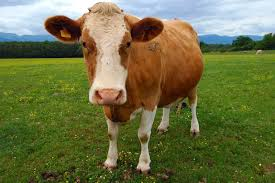

In [13]:
print("There is a cow in the picture.")
display(Image(filename="cow.jpg", width=300))

In [16]:
!python pipeline.py "There is a cow in the picture." "cow.jpg"

Processing...
Device set to use cpu
True


Case 2: incorrect statement.

It's a bird!


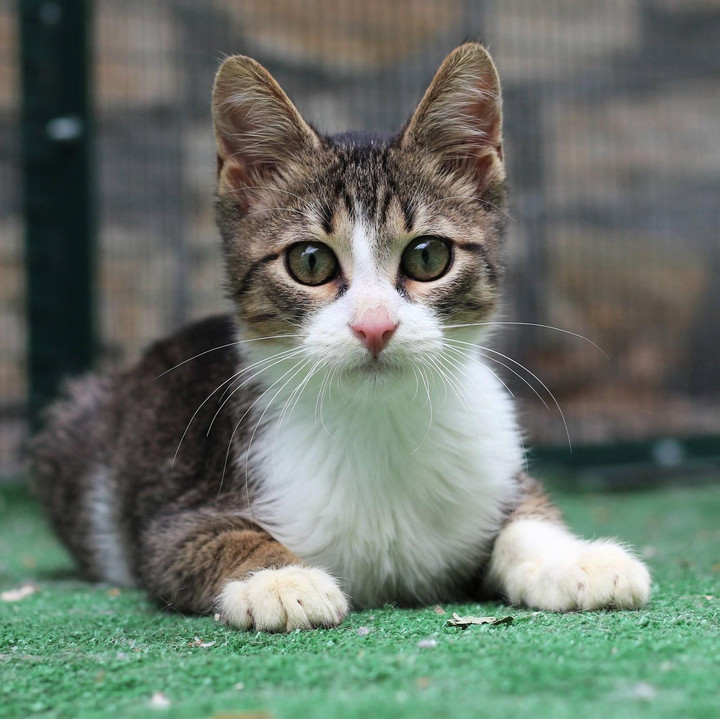

In [17]:
print("It's a bird!")
display(Image(filename="cat.jpg", width=300))

In [18]:
!python pipeline.py "It's a bird!" "cat.jpg"

Processing...
Device set to use cpu
False


Case 3: Statement didn't contain animal titles.

I don't know what it can be.


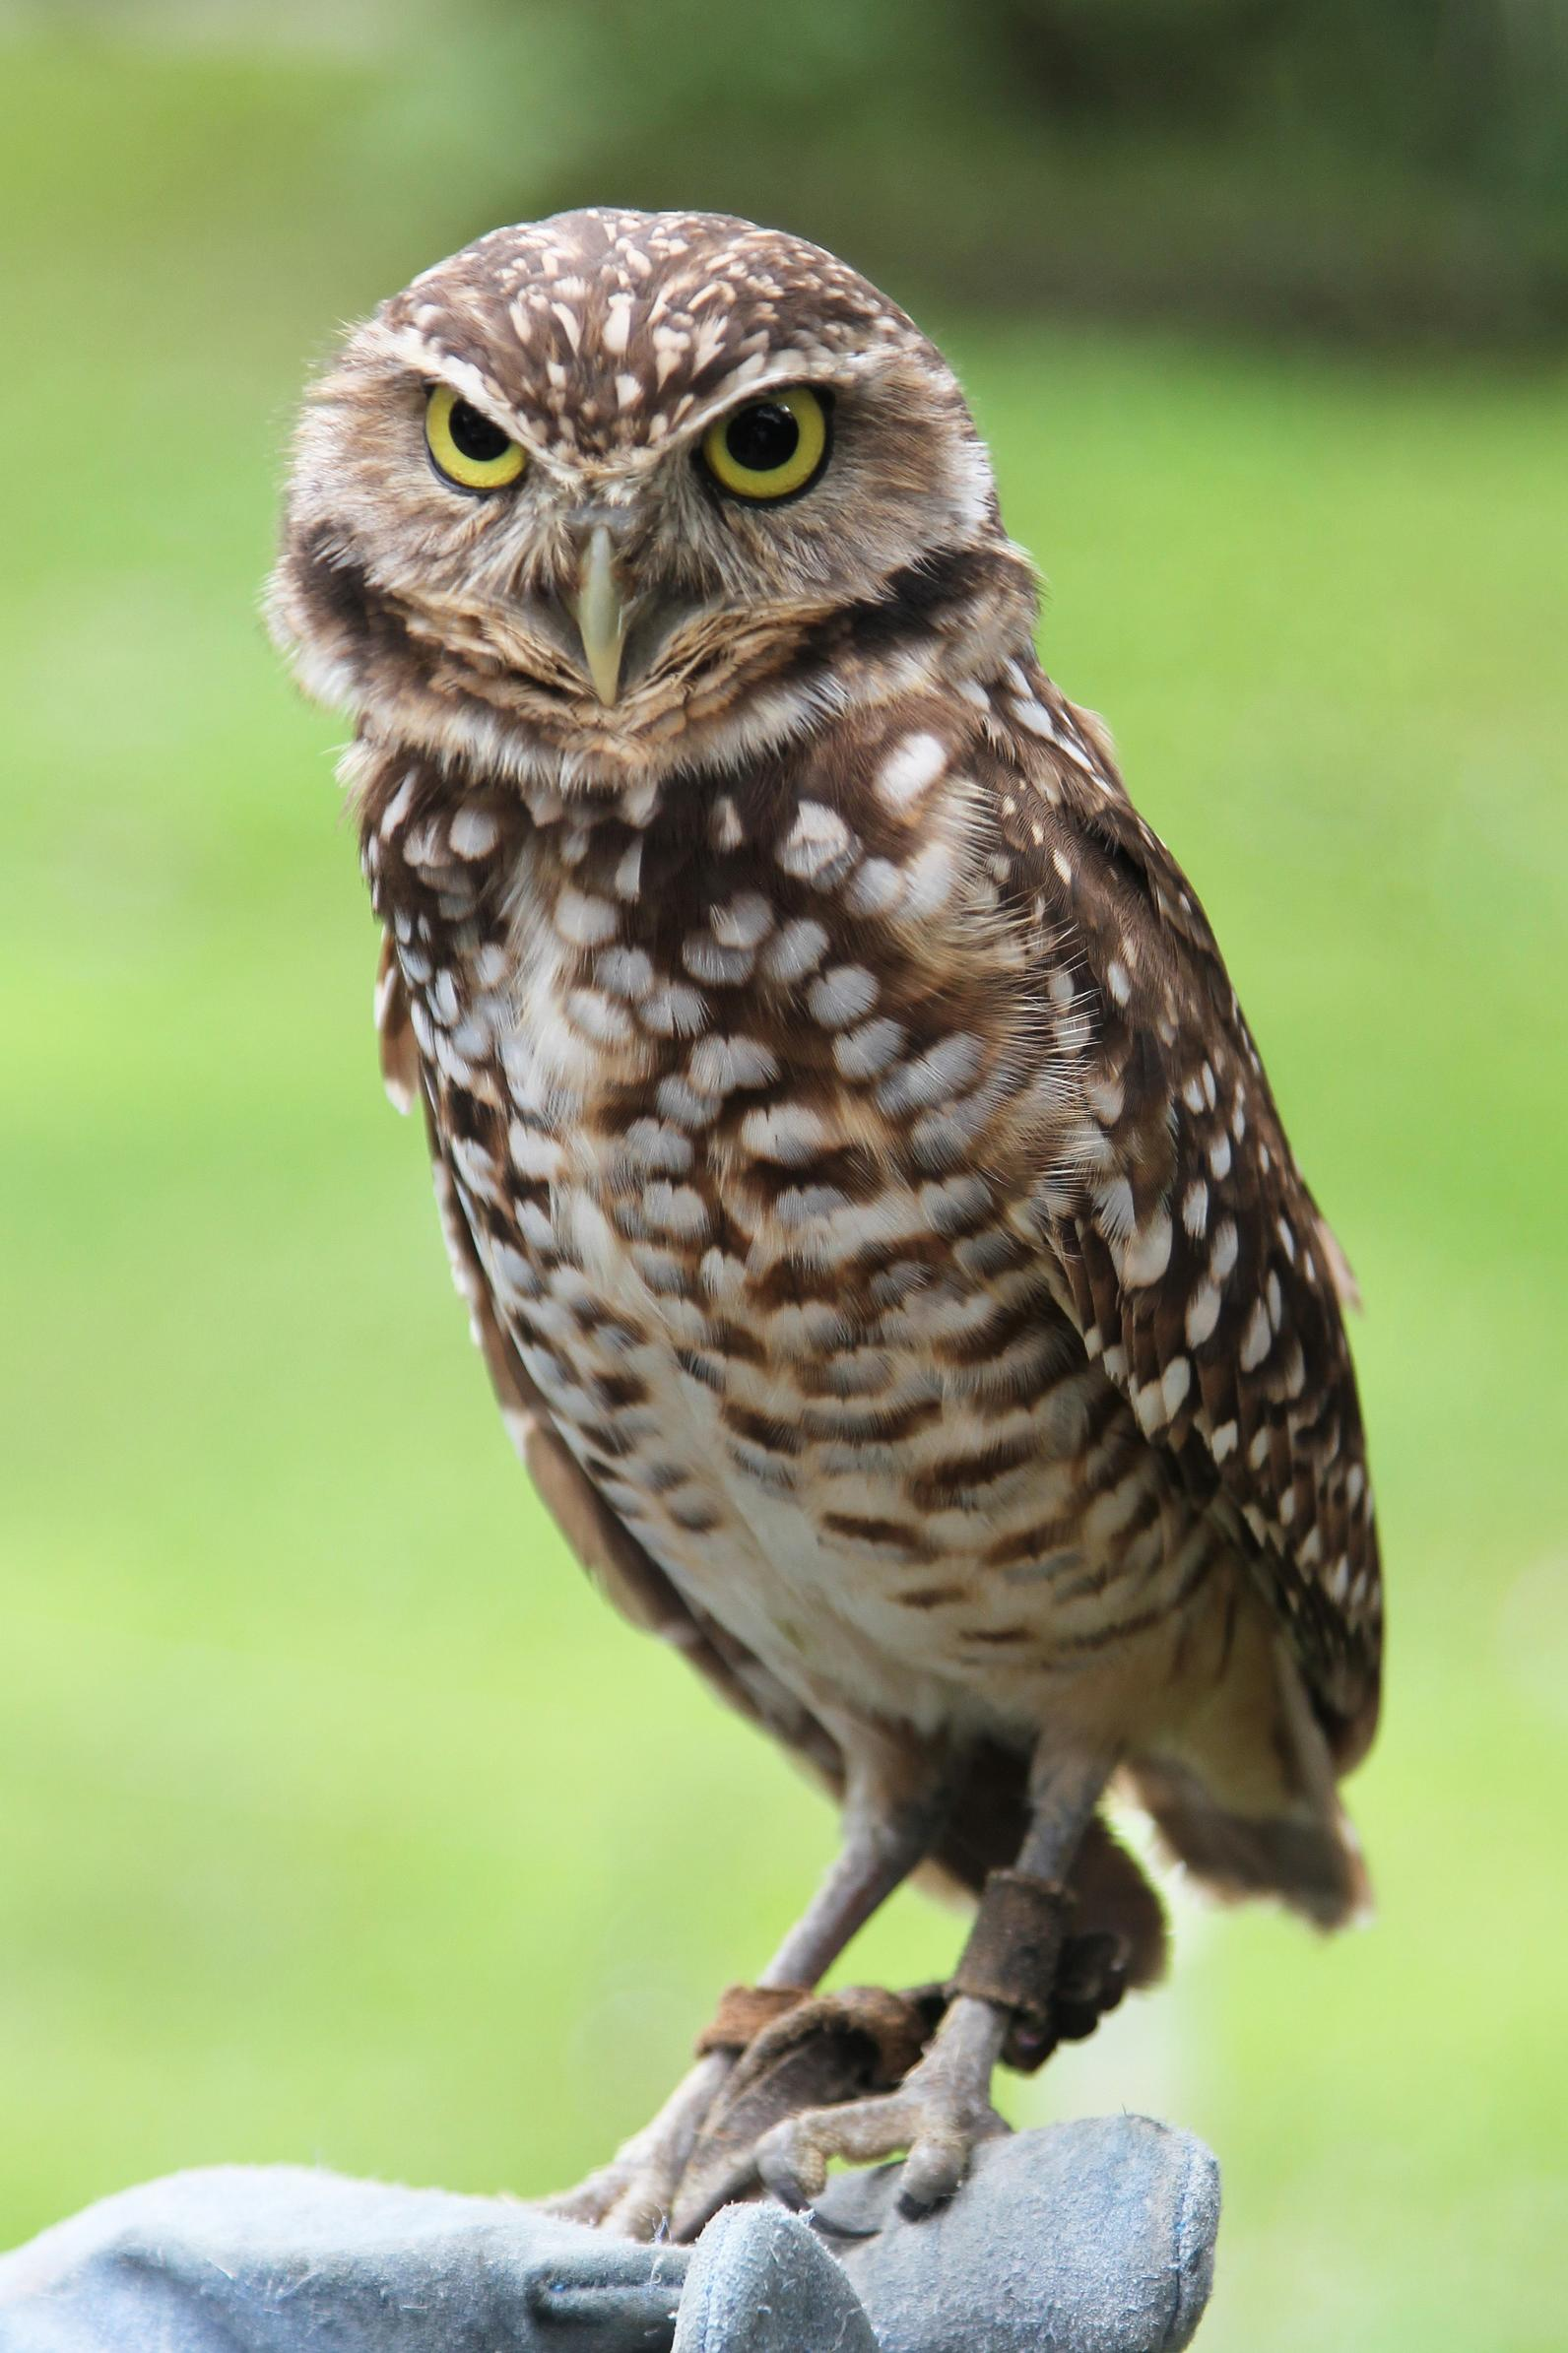

In [19]:
print("I don't know what it can be.")
display(Image(filename="owl.jpg", width=200))

In [20]:
!python pipeline.py "I don't know what it can be." "owl.jpg"

Processing...
Device set to use cpu
Error: No entity found.
False


Case 4: Statement contain two (or more) animal titles.

I guess it's an eagle or crow.


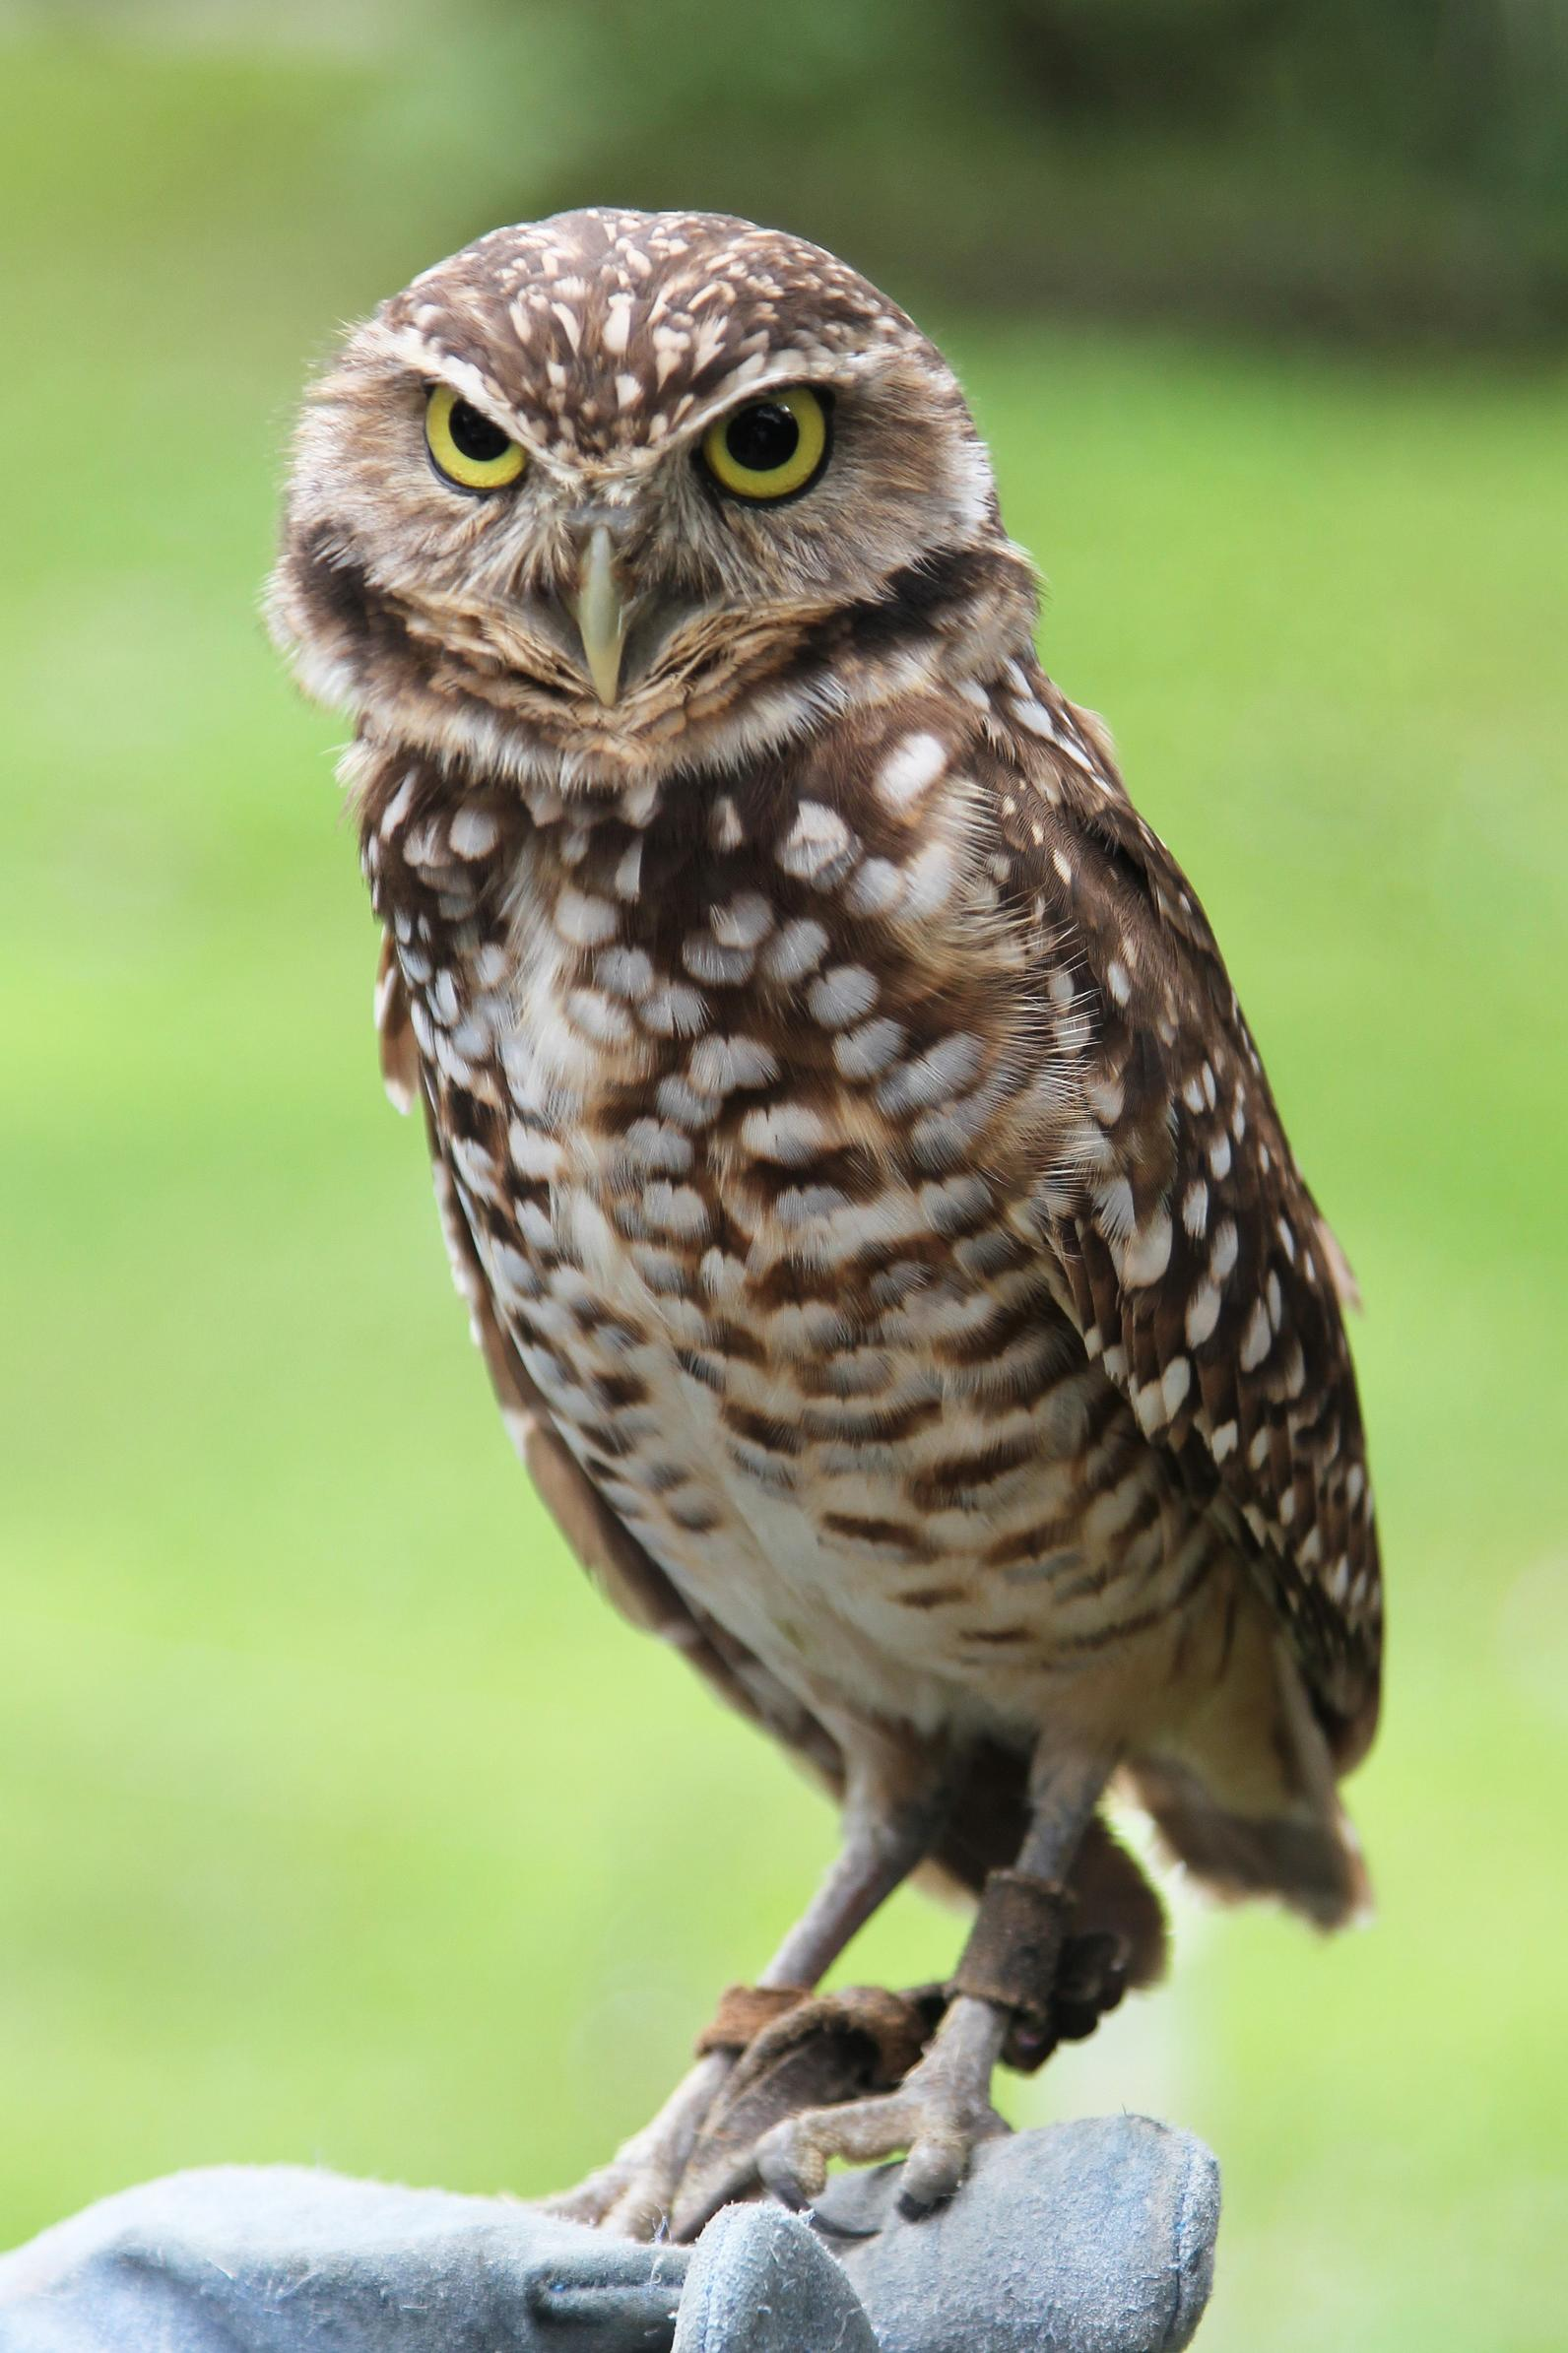

In [21]:
print("I guess it's an eagle or crow.")
display(Image(filename="owl.jpg", width=200))

In [22]:
!python pipeline.py "I guess it's an eagle or crow." "owl.jpg"

Processing...
Device set to use cpu
Error: Please provide only one answer.
False


Case 5: Image doesn't belong to any classes.

Maybe there is a penguin on the image, but I'm not sure.


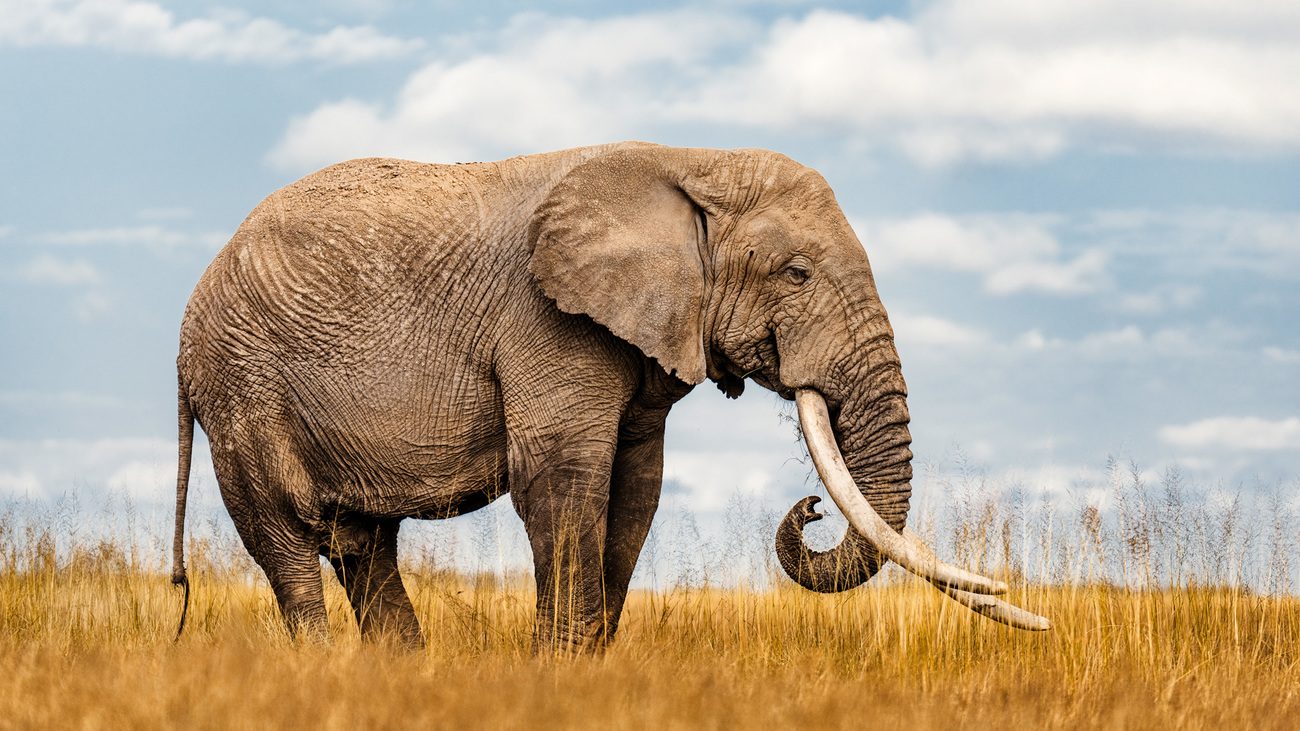

In [23]:
print("Maybe there is a penguin on the image, but I'm not sure.")
display(Image(filename="elephant.jpg", width=200))

In [24]:
!python pipeline.py "Maybe there is a penguin on the image, but I'm not sure." "elephant.jpg"

Processing...
Device set to use cpu
Unknown animal. The model can't recognize it.
False
